In [31]:
# Import required modules.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from math import log10, sqrt

In [32]:
# Open the image file, and split it into its RGB components.

original_image = Image.open("./fermanu.png")
components = Image.Image.split(original_image)

In [33]:
# Perform Singular value decomposition on each of the
# components.
# This usually is the most expensive step in the program.

U_r, sigma_r, V_r = np.linalg.svd(components[0])
U_g, sigma_g, V_g = np.linalg.svd(components[1])
U_b, sigma_b, V_b = np.linalg.svd(components[2])

In [34]:
def get_compressed_image(k):
  """
  Multiply the matrices and stack them toghether to get the compressed image.
  Doing so will get us back an h*w*3 array, but the important thing is, we don't
  need to **store** this much data in practice, but just the rows and columns corresponding to
  the first "k" principal components.
  """

  return np.dstack((
      np.asarray(np.matrix(U_r[:, 0:k]) * np.diag(sigma_r[0:k]) * np.matrix(V_r[0:k, :])),
      np.asarray(np.matrix(U_g[:, 0:k]) * np.diag(sigma_g[0:k]) * np.matrix(V_g[0:k, :])),
      np.asarray(np.matrix(U_b[:, 0:k]) * np.diag(sigma_b[0:k]) * np.matrix(V_b[0:k, :]))
  )).astype(np.uint8)


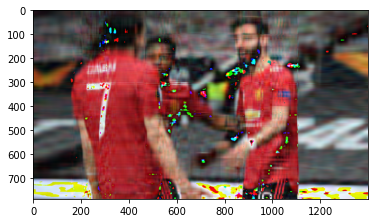

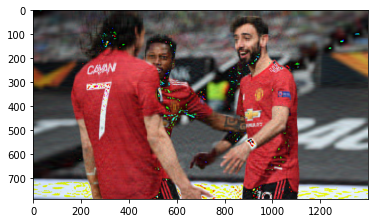

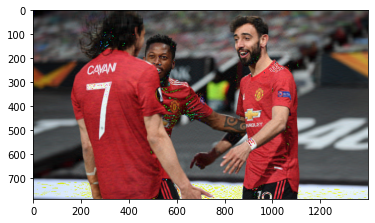

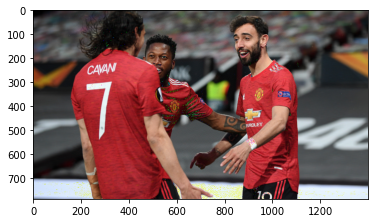

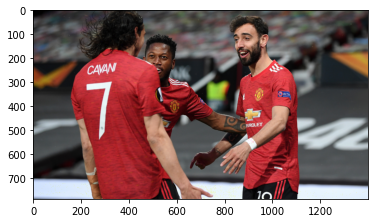

<Figure size 432x288 with 0 Axes>

In [35]:
# Number of singular values to take. This should obviously be less than
# or equal to the total number of principal components, otherwise numpy will
# throw an error.

modes = [20, 50, 100, 200, 500]
compressed_images = []

plt.ion()
for k in modes:
  compressed_images.append(get_compressed_image(k))
  # Display the compressed image.
  plt.imshow(compressed_images[-1])
  plt.pause(.1)
  plt.draw()

Clearly, there is negligible difference in quality between the last two images, and 200 principal components are suuficient to get a decent quality compressed image.

In [36]:
# Save the image. This is only for comparing the quality of
# the result with the original.

i = 0
for k in modes:
  Image.fromarray(compressed_images[i]).save("compressed" + str(i) + ".jpg")
  files.download("compressed" + str(i) + ".jpg")
  i = i + 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
def percentage_reduction(original, num_principal_components):
  """
  Calculate theoretical percentage reduction in the amount of dat
  we need to store to represent the image.
  The number of integers we need to store for the original RGB image
  are h*w*3, while those for the compressed image (if expressed as
  sum of k rank 1 matrices are) k*(1+h+w)*3.
  """
  shape = original.shape
  h = shape[0]
  w = shape[1]
  original_size = h*w*3
  compressed_size = num_principal_components*(1+h+w)*3
  return (original_size - compressed_size)/original_size * 100

for k in modes:
  print("Components selected: ", k, "/", sigma_r.shape[0])
  print("Reduction in size: ", percentage_reduction(np.array(original_image), k), "%")

Components selected:  20 / 788
Reduction in size:  96.03154459753445 %
Components selected:  50 / 788
Reduction in size:  90.07886149383611 %
Components selected:  100 / 788
Reduction in size:  80.15772298767223 %
Components selected:  200 / 788
Reduction in size:  60.31544597534445 %
Components selected:  500 / 788
Reduction in size:  0.7886149383611313 %


As expected, as we go on increasing the number of principal components, the size reduction we get decreases.
If we take **all** of the modes, we will get the original image back.

In [39]:
def PSNR(original, compressed):
  """
  Given arrays for original and compressed images,
  calculates the PSNR index.

  Higher is better.
  """

  mse = np.mean((original - compressed) ** 2)
  if mse == 0:
	  return 100

  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

i = 0
for k in modes:
  print("PSNR value is", PSNR(original_image, compressed_images[i]))
  i = i + 1

PSNR value is 29.94117284941045
PSNR value is 32.511682844820555
PSNR value is 35.19224869153871
PSNR value is 38.59349352229452
PSNR value is 48.1624117890977
